In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cancer_file = open( "cancer.txt", "r" )

In [2]:
#Load dataset into Pandas DataFrame with column names as array in names
df = pd.read_csv( cancer_file, names = ['Accession no.', 'AAQ08976.1', 'AF304370.1', 'AF338650.1', 
                                        'AF455138.1', 'AY008445.1', 'FJ649644.1', 'NP001035756.1', 'NP001231873.1'])

In [3]:
#Add in labels
features = ['Accession no.', 'AAQ08976.1', 'AF304370.1', 'AF338650.1',
'AF455138.1', 'AY008445.1', 'FJ649644.1', 'NP001035756.1', 'NP001231873.1']

#Separating out features
x = df.loc[:,features].values

#Separating out target
y = df.loc[:,['Accession no.']].values

In [4]:
x_stand = StandardScaler().fit_transform( x[:,1:] )

C:\Users\inoct\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\inoct\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
cancer_pca = PCA( n_components=2 )
principalComponents = cancer_pca.fit_transform(x_stand)

#print( principalComponents )
principalDf = pd.DataFrame( data = principalComponents,
                          columns = ['Principal Component 1', 'Principal Component 2'])

In [6]:
finalDf = pd.concat( [principalDf, df[['Accession no.']]], axis = 1 )

Visualizing the Projection

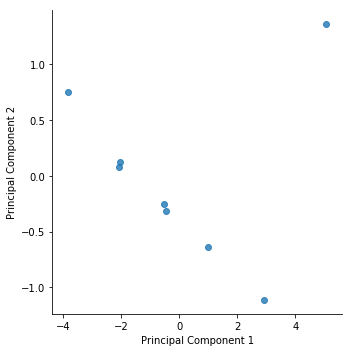

In [7]:
#How-To: https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/
sns.lmplot( 'Principal Component 1', 'Principal Component 2', data = finalDf, fit_reg = False )
#print( finalDf )

In [8]:
# This was the data using matplotlib and the tutorial's techniques.
'''
fig = plt.figure( figsize = (10,10) )    #set size of the pixels
ax = fig.add_subplot(1,1,1)
ax.set_xlabel( 'Principal Component 1', fontsize = 15)
ax.set_ylabel( 'Principal Component 2', fontsize = 15)
ax.set_title( 'Cancer vs Normal Cells', fontsize = 20 )

colors = ['red','magenta','yellow','green','darkgreen','cyan','blue','black']

for feature, color in zip( features, colors ):
    indicesToKeep = finalDf['Accession no.'] == feature
    ax.scatter( finalDf.loc[indicesToKeep, 'Principal Component 1']
              , finalDf.loc[indicesToKeep, 'Principal Component 2']
              , c = color, s = 50 )
ax.legend(features)
ax.grid()
plt.show()
'''

"\nfig = plt.figure( figsize = (10,10) )    #set size of the pixels\nax = fig.add_subplot(1,1,1)\nax.set_xlabel( 'Principal Component 1', fontsize = 15)\nax.set_ylabel( 'Principal Component 2', fontsize = 15)\nax.set_title( 'Cancer vs Normal Cells', fontsize = 20 )\n\ncolors = ['red','magenta','yellow','green','darkgreen','cyan','blue','black']\n\nfor feature, color in zip( features, colors ):\n    indicesToKeep = finalDf['Accession no.'] == feature\n    ax.scatter( finalDf.loc[indicesToKeep, 'Principal Component 1']\n              , finalDf.loc[indicesToKeep, 'Principal Component 2']\n              , c = color, s = 50 )\nax.legend(features)\nax.grid()\nplt.show()\n"